# ILP Formulation - 2

Datasets are all from <br>
http://steinlib.zib.de/steinlib.php

Implementation of "A Linear Programming Based Approach to the Steiner Tree Problem with a Fixed Number of Terminals"

## Model Formulation (Model $\mathcal{Z_l}$)

### Model description

“We propose an IP model $\mathcal{Z_l}$ that finds an optimal solution for a given laminar family $l \in \mathcal{L}_{b}$, where $b = |K|$. Since we are considering a fixed laminar family $l$, we are given $S(l)$, the set of subsets of $K$ that we use, and the partitions that are performed, as well as the $\textit{parent}$ and $\textit{child}$ sets of each set in $S(l)$. Therefore, the main purpose of our model is to choose the node where each partition is performed.” -- cited from "A Linear Programming Based Approach to the Steiner Tree Problem with a Fixed Number of Terminals"

### Sets and Indices

$\text{G} = (\text{V} , \text{E})$: An undirected graph.

$\text{V} = \{1,2,...\}$: Set of vertices.

$\text{E} = \{(i,j)\}$ : Set of edges.

$\text{D} = (\text{V} , \text{A})$: A directed graph generated from G.

$\text{A} = \{(i,j)\}$ : Set of arcs where $(i, j) \neq (j, i)$.

$\text{R} \subset \text{V}$: The set of terminals(a subset of $\text{V}$).

$\text{K}$: The set of commodities, with one commodity for each of the nodes in $\text{R} \backslash \{r\}$. All of the commodities in $\text{K}$ share the same source node $r$, and the sink node of commodity $k \in K$, denoted by $t_k$.

$\mathcal{L}_{b}$: The set of all possible laminar families when $|K| = b$

$S(l)$: The set of elements in $S$ that define laminar family $l$.

$P(l)$: The set of partitions used to split the subsets in $S(l)$.

$s', \hat{s}$: For any $s' \in S(l)$ such that $|s'| ≤ |K| − 1$, we say that $\hat{s}$ is its $\textit{parent}$ set if $s'$ is one of the sets obtained when we partition set $\hat{s}$ according to laminar family $l$. Similarly, for any set $\hat{s} \in S(l)$ such that $|\hat{s}| ≥ 2$, we say that $s'$ is a $\textit{child}$ set of $\hat{s}$, if we obtain s' when we partition $\hat{s}$.

$S_{l}(p)$: The set of all child nodes of partition $p$ in laminar family $l$.

$P_{l}(s)$: The partition $p$ that splits $s$ in laminar family $l$, which is defined only for sets $s$, such that $|s| ≥ 2$ 

$\text{T}$: The Steiner tree in the structure $(r, l)$, the arborescence rooted in $r$ contained in $\text{T}$ belongs to
laminar family $l \in \mathcal{L}_{b}$, where $b = |R\backslash\{r\}|$. 

### Parameters 

$c_{a}, c_{e} \in \mathbb{R}^+$: The cost of an edge $e$ or an arc $a$ all $e$ $\in \text{E}$. $c_{a} = c_{e}$ for all $a \in \text{A}$ such that both of its end nodes correspond to the end nodes of $e \in \text{E}$.

$r$: Let $r \in \text{R}$ be the arbitrarily selected root node.

### Decision Variables

$f^s_a$: The variable $f^s_a$ is 1 if we send flow in arc $a$ for subset $s$, and 0 otherwise.

$\hat{y}^s_i$: The variable $\hat{y}^s_i$ is 1 if commodities in set $s$ $\textit{start}$ sharing a path in node i, and 0 otherwise.

$\overline{y}^s_i$: The variable $\overline{y}^s_i$ is 1 if commodities in set $s$ $\textit{end}$ sharing a path in node i, and 0 otherwise.

$w^p_i$: The variable $w^p_i$ is 1 if a partition p is performed in node i, and 0 otherwise.

### Objective Function

\begin{equation}
\text{Min} \sum_{a \in \text{A}}c_{a} \Big(\sum_{s \in \text{S(l)}}f^s_a\Big)
\tag{0}
\end{equation}

### Constraints 

\begin{equation}
\sum_{a \in \delta^+(i)}f^s_a - \sum_{a \in \delta^-(i)}f^s_a = \hat{y}^s_i - \overline{y}^s_i \quad \forall i \in V, s\in S(l)
\tag{1}
\end{equation}

\begin{equation}
w^p_i = \overline{y}^s_i \quad \forall i \in V, s \in S(l) : |s| \geq 2, p \in P_l(s)
\tag{2}
\end{equation}

\begin{equation}
w^p_i = \hat{y}^s_i \quad \forall i \in V, p \in P(l), s \in S_l(p)
\tag{3}
\end{equation}

\begin{equation}
\sum_{i \in V}w^p_i = 1 \quad \forall p \in P(l)
\tag{4}
\end{equation}

\begin{equation}
\hat{y}^K_r = 1
\tag{5}
\end{equation}

\begin{equation}
\hat{y}^K_i = 0 \quad \forall i \in V \backslash \{r\}
\tag{6}
\end{equation}

\begin{equation}
\overline{y}^{k}_{t_k} = 1 \quad \forall k \in K
\tag{7}
\end{equation}

\begin{equation}
\overline{y}^k_i = 0 \quad \forall k \in K, i \in V \backslash \{t_k\}
\tag{8}
\end{equation}

\begin{equation}
f \in \big\{0, 1\big\}^{|A| \times |S(l)|}
\tag{9}
\end{equation}

\begin{equation}
(\hat{y}, \overline{y}) \in \big\{0, 1\big\}^{|V| \times |S(l)|}
\tag{10}
\end{equation}

\begin{equation}
w \in \big\{0, 1\big\}^{|V| \times |P(l)|}
\tag{11}
\end{equation}

## Example
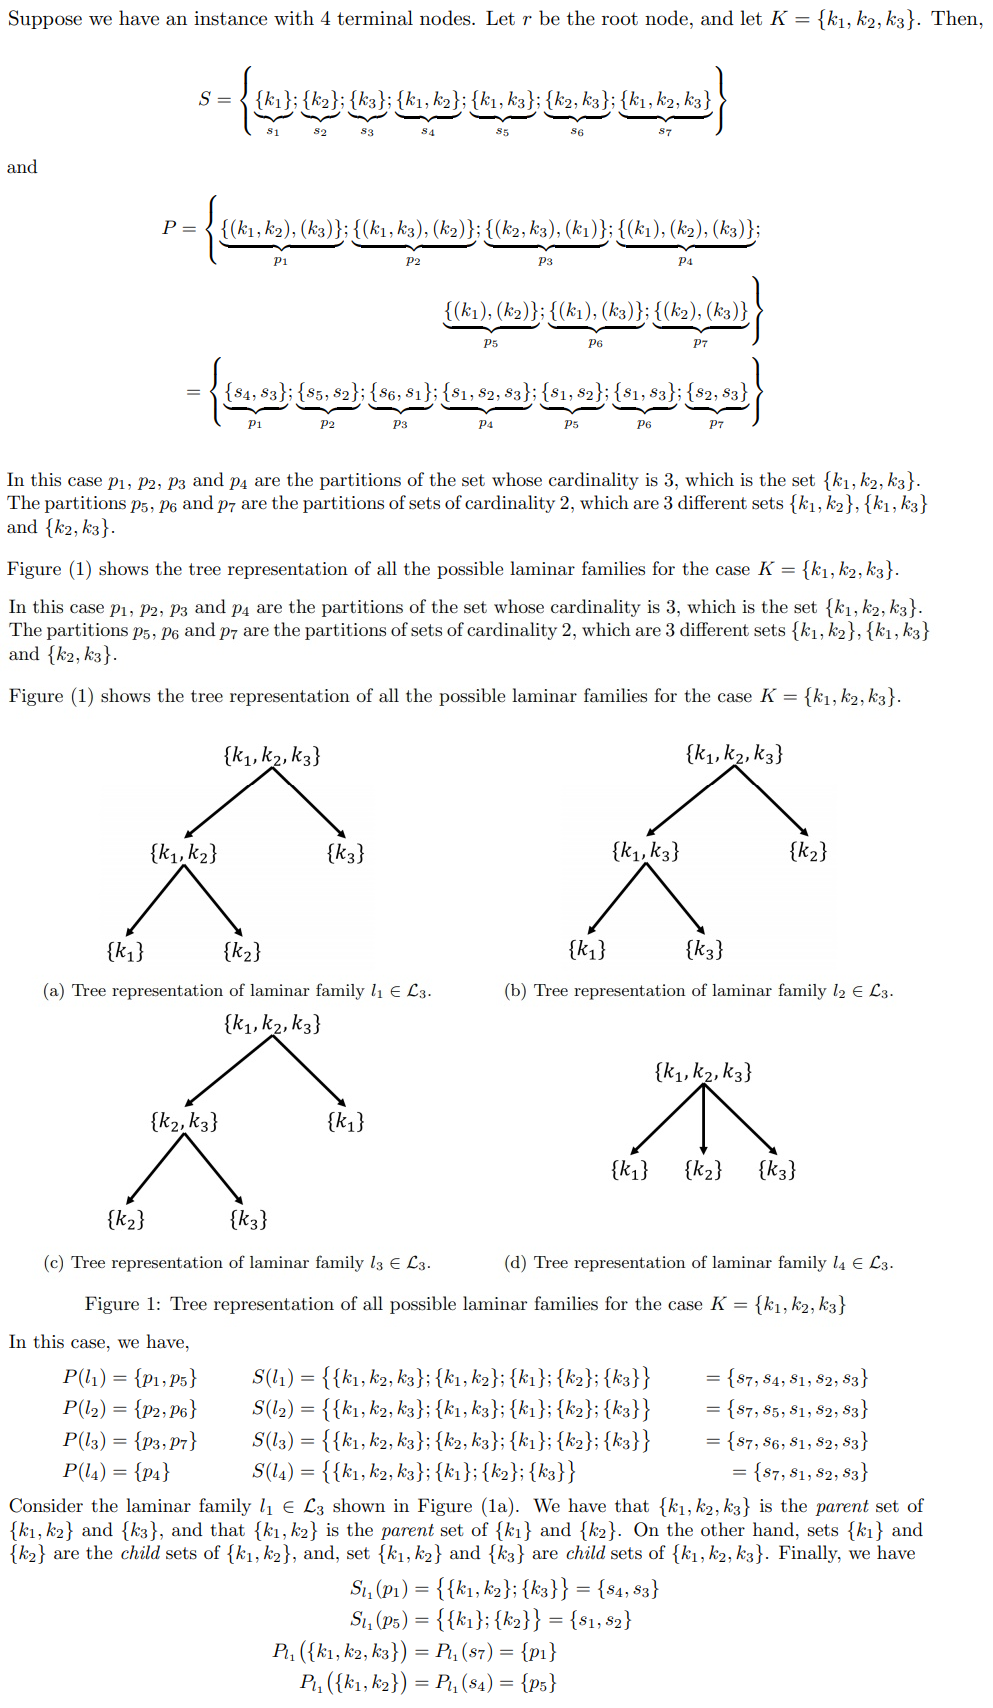

### Class Define

In [1]:
class Node(object):
    def __init__(self, partition=None, status=None, parent=None, children=None):
        self.partition = partition
        self.status = status
        self.parent = parent
        if not children:
            self.children = []
        else:
            self.children = children
    def add_child(self, child):
        self.children.append(child)


class Tree(object):
    def __init__(self, root=None):
        self.root = root

### Reading Input Data & Preprocessing
Reading the undirected graph $G=(V,E,R)$ and trans it into the format $D=(V,A,R)$ 

In [2]:
# Read and save dataframe
import pandas as pd 
def read_df(file_name):
    df = pd.read_csv("../df/"+file_name+".csv")
    return df

def save_df(df, file_name):
    df.to_csv("../df/"+file_name+".csv", index=False)

In [3]:
import numpy as np
def read_graph(name):
    with open(name) as f:
        lines = f.readlines()
        arcs = []
        for line in lines:
            if line == '\n': 
                continue
            parts = line.split()
            det = parts[0]
            if det == 'Name':
                name = parts[1]
            elif det == 'Nodes':
                n_vertices = int(parts[1])
            elif det == 'Edges':
                n_edges = int(parts[1])
            elif det == 'E':
                i = int(parts[1])
                j = int(parts[2])
                c = int(parts[3])
                arcij = ((i,j),c)
                arcji = ((j,i),c)
                arcs.append(arcij)
                arcs.append(arcji)
            elif det == 'Terminals':
                n_terminals = int(parts[1])
        vertices = np.arange(1, int(n_vertices)+1)
        vertices = vertices.tolist()
        terminals = np.arange(1, int(n_terminals)+1)
        terminals = terminals.tolist()
        assert(int(n_edges) == len(arcs)/2)
    f.close()
    ### The format of graphs is D=(V,A,R)
    return [vertices, arcs, terminals]

In [4]:
sizes=["I320/"]

In [5]:
import os
graphs = {}
path = "../ds/"
for size in sizes:
    files = os.listdir(path+size)
    for file in files:
        file_name = file[:-4]
        graph = read_graph(path+size+file)
        graphs[file_name] = graph

In [6]:
print("The number of datasets used for this project is:{}".format(len(graphs)))

The number of datasets used for this project is:1


## Code Implementation
The formulation above is implemented in $\textit{Python}$ using $\textit{Gurobi 9.1.2 Windows 64-bit version}$.

In [7]:
import gurobipy as gp
from gurobipy import GRB

In [8]:
def to_dict(mylist):
    index = range(1, len(mylist)+1)
    return dict(zip(index, mylist))

In [9]:
import itertools
def find_all_subsets(mylist):
    sol = []
    for a in range(len(mylist)):
        for i in itertools.combinations(mylist, a+1):
            sol.append(list(i))
    return sol

In [10]:
# Solution is from https://stackoverflow.com/questions/19368375/set-partitions-in-python
# The author is alexis
def create_partition_dict(collection):
    if len(collection) == 1:
        yield [ collection ]
        return

    first = collection[0]
    for smaller in create_partition_dict(collection[1:]):
        # insert `first` in each of the subpartition's subsets
        for n, subset in enumerate(smaller):
            yield smaller[:n] + [[ first ] + subset]  + smaller[n+1:]
        # put `first` in its own subset 
        yield [ [ first ] ] + smaller

In [11]:
def find_all_partitions(mylist):
    # Create the index partition dict first
    max_length = len(list(mylist)[-1])
    partition_dict = {}
    for i in range(2, max_length+1):
        partition_dict[i] = []
        for each in create_partition_dict(list(range(i))):
            partition_dict[i].append(each)
    # Get all partitions of mylist based on the partition dict
    sol = []
    for each in mylist:
        n = len(each)
        if n >= 2:
            partitions = partition_dict[n]
            # Based on the partition dict, get the actual partition
            for partition in partitions:
                tmp_partition = []
                for part in partition:
                    tmp_part = []
                    for index in part:
                        tmp_part.append(each[index])
                    tmp_partition.append(tmp_part)
                sol.append(tmp_partition)
    # Remove the useless partitions which return themselves
    for each in sol:
        if(len(each) == 1):
            sol.remove(each)
    return sol

In [12]:
from collections.abc import Iterable
def flatten(lis):
    for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:        
            yield item

In [13]:
def check_partition(mylist, partition):
    tmp = [part for part in mylist if len(part)!= 1]
    for each in tmp:
        if list(flatten(each)) == sorted(list(flatten(partition))):
            return True
    return False

In [14]:
def find_partition_target(mylist, partition):
    tmp = [part for part in mylist if len(part)!= 1]
    for each in tmp:
        if list(flatten(each)) == sorted(list(flatten(partition))):
            return each
    return False

In [15]:
def apply_partition(mylist, partition):
    if not check_partition(mylist, partition):
        return False
    tar = find_partition_target(mylist, partition)
    sol = [rest for rest in mylist if rest != tar]
    sol += partition
    return sol

In [118]:
def get_key(val, my_dict):
    for key, value in my_dict.items():
        if val == value:
            return key

In [131]:
def laminar_family_generation(S, P):
    start = [list(S.values())[-1]]
    end = [[each] for each in start]
    # create the tree 
    tree = Tree(Node(status=start))
    check_list = []
    check_list.append(tree.root)
    while len(check_list) != 0:
        # Get the current node and remove it from the check list
        current = check_list[0]
        check_list.remove(current)
        for partition in P.values():
            if check_partition(current.status, partition):
                tmp = Node(partition,apply_partition(current.status, partition) ,current)
                check_list.append(tmp)
                current.add_child(tmp)
    # The partition tree has been constructed now
    # I will find all the ending nodes and backtrace the partition path
    check_list = []
    ending = []
    check_list.append(tree.root)
    while len(check_list) != 0:
        current = check_list[0]
        check_list.remove(current)
        check_list += current.children
        if len(current.children) == 0: 
            ending.append(current)
    # Now I will creat 2 dict for S and P based on laminar family l
    # And remove the duplicates
    print(len(ending))
    return None

In [142]:
def formulation_2(D):
    # read D=(V,A,R)
    V, A, R = D
    
    # obtain the size of each set
    len_V = len(V) # len_V = number of vertices
    len_A = len(A) # len_A = number of edges
    len_R = len(R) # len_R = number of ternimals
    
    # choose 1 out of ternimals as the arbitrarily selected root node
    r = R[0]
    
    # TEST CASE OF SIZE 4
    R = [0,1,2,3,4]
    r = [0]
    
    # Set K of commodities, with one commodity for each of the nodes in R∖{r}
    # Set S be the set of all subsets of K with at least one element
    K = to_dict(R[1:])
    S = to_dict(find_all_subsets(R[1:]))
    # Set P be the set of all proper partitions of the elements of S that have cardinality of at least 2.
    P = to_dict(find_all_partitions(S.values()))
    
    # let S(l) be the set of elements in S that define laminar family l
    # let P(l) be the collection of partitions used to split the sets in S(l)
    # Here I generate the laminar family as a set of trees, each of the tree represent
    # a path from the starting status to the ending status. For example, [1, 2, 3] ->
    # [[1], [2, 3]] by partition [[1], [2, 3]] -> [[1], [2], [3]] by partition [[2], [3]]
    # S(l), P(l), S_l(p), P_l(s) are all easily to obtain from the laminar family tree.
    LF = laminar_family_generation(S, P)
    return 0

In [143]:
formulation_2(graphs["i320-043"])

29


0